In [2]:
!pip install caer canaro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 16.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 83.9 MB/s eta 0:00:0000:0100:01


In [3]:
import os 
import canaro
import caer
import cv2 as cv
import numpy as np
import gc

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [4]:
IMG_SIZE = (80,80)
channel = 1
char_path = r'/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset'

In [5]:
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path,char)))
    #storing the number of images in each folder
    
#sorting
char_dict = caer.sort_dict(char_dict,descending = True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [6]:
#Top 10 characters
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count += 1
    if count > 10:
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten',
 'chief_wiggum']

In [7]:
#create the training data set
train = caer.preprocess_from_dir(char_path, characters, channels = channel, IMG_SIZE = IMG_SIZE, isShuffle = True)
#basically go in the directory, look for the top 10 folders and add the images to the training data set, suppose homer simpson is at the 0th index, so all the images of homer simpson will have a label of 0, that is how the mapping is done

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 3.5100574493408203s
[INFO] At 1000 files
[INFO] 1454 files found in 1.1082377433776855s
[INFO] At 1000 files
[INFO] 1452 files found in 1.0588316917419434s
[INFO] At 1000 files
[INFO] 1354 files found in 0.80076003074646s
[INFO] At 1000 files
[INFO] 1342 files found in 0.6537270545959473s
[INFO] At 1000 files
[INFO] 1291 files found in 0.5341575145721436s
[INFO] At 1000 files
[INFO] 1206 files found in 0.22873640060424805s
[INFO] At 1000 files
[INFO] 1194 files found in 0.20929598808288574s
[INFO] At 1000 files
[INFO] 1193 files found in 0.16386723518371582s
[INFO] At 1000 files
[INFO] 1079 files found in 0.004385471343994141s
[INFO] 986 files found in 0.004194498062133789s
----------------------------------------------
[INFO] 14797 files preprocessed! Took 2m 54s


In [8]:
len(train)

14797

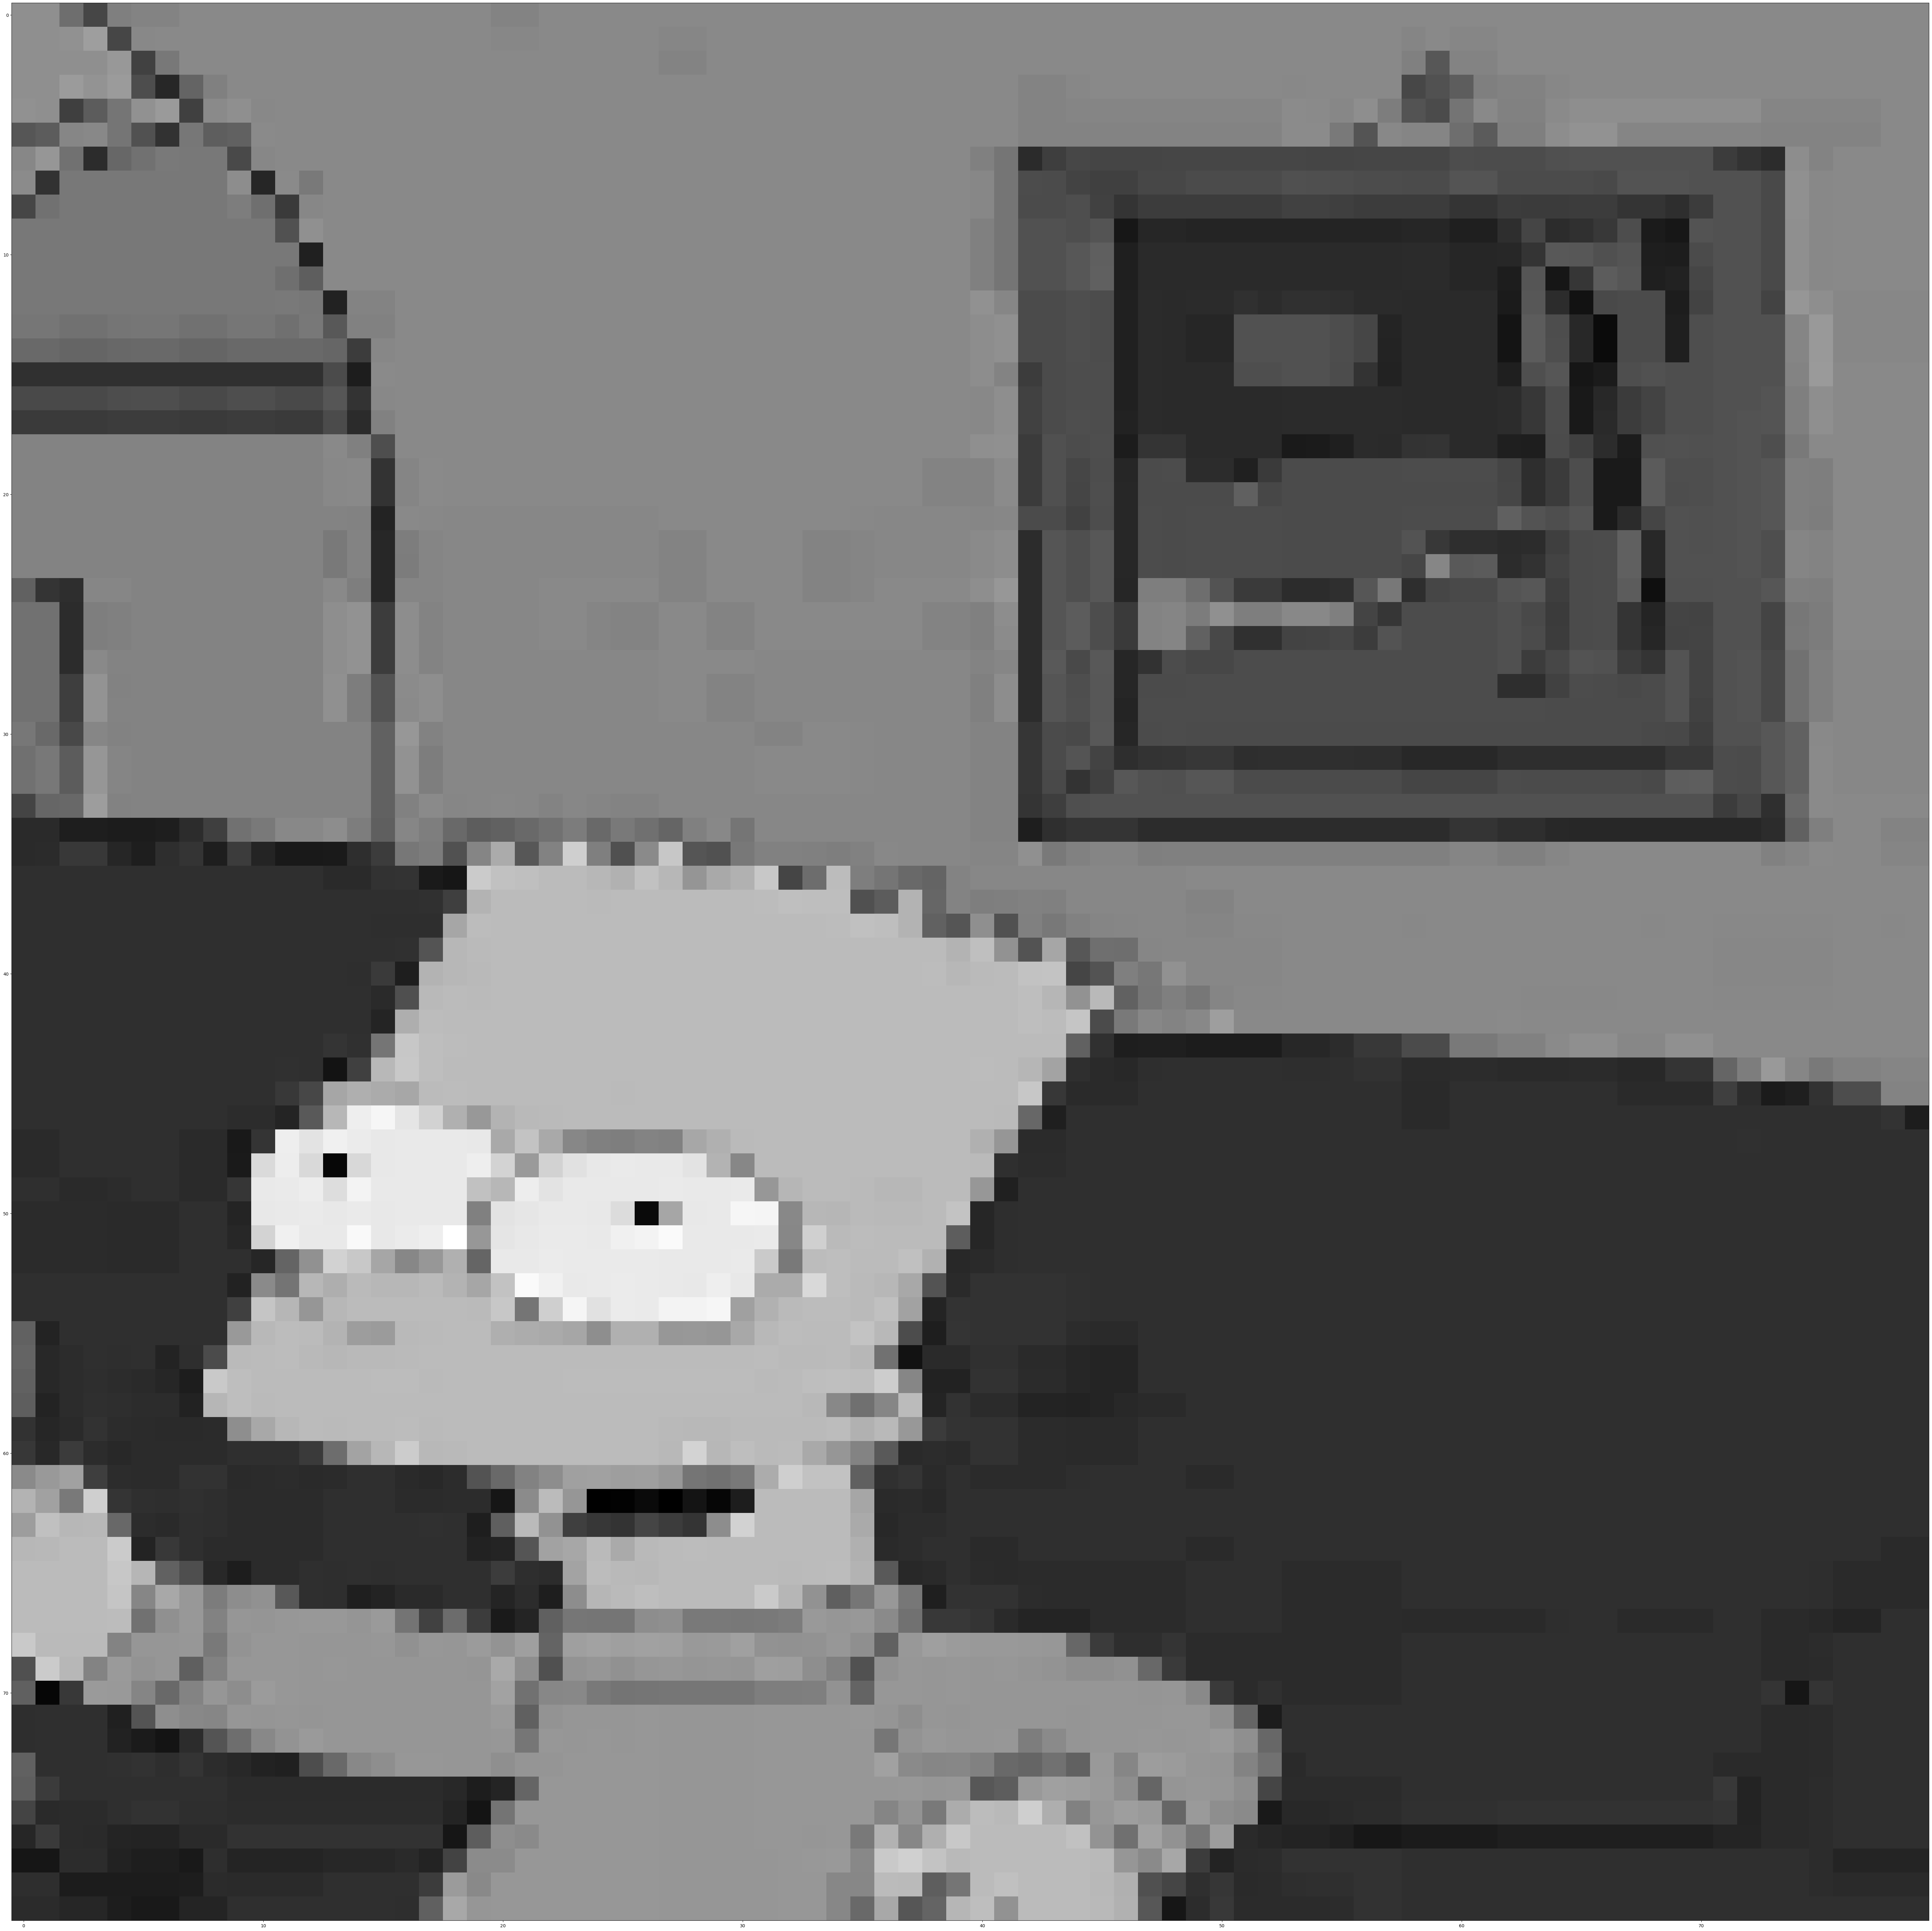

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=IMG_SIZE)
plt.imshow(train[0][0],cmap='gray')
plt.show()

In [10]:
#separate the dataset into features and labels
featureSet,labels = caer.sep_train(train,IMG_SIZE=IMG_SIZE)

In [11]:
from tensorflow.keras.utils import to_categorical
#normalising the feature set
feaureSet = caer.normalize(featureSet)
labels = to_categorical(labels,len(characters))

In [12]:
x_train,x_val,y_train,y_val = caer.train_val_split(featureSet,labels, val_ratio =.2)
#80 20 split

In [13]:
del train
del featureSet
del labels
gc.collect()
#delete all the variables which are not required


0

In [14]:
BATCH_SIZE = 32
EPOCHS = 10

In [15]:
#image data generator
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train,y_train,batch_size = BATCH_SIZE)

In [16]:
from keras.models import Sequential

from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

from keras.optimizers import SGD



MG_SIZE = (80,80)

LEARNING_RATE = 0.001

DECAY = 1e-7

MOMENTUM = .9

EPOCHS = 10

BATCH_SIZE = 32



def createSimpsonsModel(IMG_SIZE=(224,224), channels=1, output_dim=1, loss='binary_crossentropy', decay=None, learning_rate=None, momentum=None, nesterov=None):

    if not isinstance(output_dim, int):

        raise ValueError('[ERROR] Output dimensions need to be an integer')

    if not isinstance(channels, int):

        raise ValueError('[ERROR] Channels needs to be an integer')



    # # If 'channels first', update the input_shape

    # if backend.image_data_format() == 'channels_first':

    #     input_shape = (channels, img_size,img_size)

        

    w, h = IMG_SIZE[:2]

    

    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(w, h, channels)))

    model.add(Conv2D(32, (3, 3), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.2))



    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

    model.add(Conv2D(64, (3, 3), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.2))



    model.add(Conv2D(256, (3, 3), padding='same', activation='relu')) 

    model.add(Conv2D(256, (3, 3), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.2))



    model.add(Flatten())

    model.add(Dropout(0.5))

    model.add(Dense(1024, activation='relu'))

    

    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(w, h,channels)))

    model.add(Conv2D(32, (3, 3), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.2))



    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

    model.add(Conv2D(64, (3, 3), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.2))



    model.add(Conv2D(256, (3, 3), padding='same', activation='relu')) 

    model.add(Conv2D(256, (3, 3), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.2))



    model.add(Flatten())

    model.add(Dropout(0.5))

    model.add(Dense(1024, activation='relu'))

    

    # Output Layer

    model.add(Dense(output_dim, activation='softmax'))



    optimizer = SGD(lr=learning_rate, decay=decay, momentum=momentum, nesterov=nesterov)



    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

    return model

In [38]:
model = createSimpsonsModel(IMG_SIZE=IMG_SIZE, channels=channel, output_dim=len(characters), 
                                         loss='binary_crossentropy', decay=1e-5, learning_rate=0.001, momentum=0.9,
                                         nesterov=True)

In [34]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 80, 80, 32)        320       
                                                                 
 conv2d_55 (Conv2D)          (None, 78, 78, 32)        9248      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 39, 39, 32)       0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 39, 39, 32)        0         
                                                                 
 conv2d_56 (Conv2D)          (None, 39, 39, 64)        18496     
                                                                 
 conv2d_57 (Conv2D)          (None, 37, 37, 64)        36928     
                                                      

In [23]:
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks = [LearningRateScheduler(canaro.lr_schedule)]

In [40]:
#training our model
training = model.fit(train_gen,
                    steps_per_epoch = len(x_train)//BATCH_SIZE,
                    epochs = 30,
                    validation_data = (x_val,y_val),
                    validation_steps = len(y_val)//BATCH_SIZE,
                    callbacks = callbacks)

Epoch 1/30
369/369 [==============================] - 11s 29ms/step - loss: 0.2246 - accuracy: 0.4598 - lr: 0.0100
Epoch 2/30
369/369 [==============================] - 10s 27ms/step - loss: 0.2193 - accuracy: 0.4778 - lr: 0.0100
Epoch 3/30
369/369 [==============================] - 10s 28ms/step - loss: 0.2139 - accuracy: 0.4973 - lr: 0.0100
Epoch 4/30
369/369 [==============================] - 10s 28ms/step - loss: 0.2068 - accuracy: 0.5169 - lr: 0.0100
Epoch 5/30
369/369 [==============================] - 10s 28ms/step - loss: 0.2018 - accuracy: 0.5294 - lr: 0.0100
Epoch 6/30
369/369 [==============================] - 10s 28ms/step - loss: 0.1957 - accuracy: 0.5507 - lr: 0.0100
Epoch 7/30
369/369 [==============================] - 10s 28ms/step - loss: 0.1901 - accuracy: 0.5649 - lr: 0.0100
Epoch 8/30
369/369 [==============================] - 11s 29ms/step - loss: 0.1848 - accuracy: 0.5774 - lr: 0.0100
Epoch 9/30
369/369 [==============================] - 10s 28ms/step - loss: 0.17

In [41]:
test_path = r'/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/bart_simpson_13.jpg'

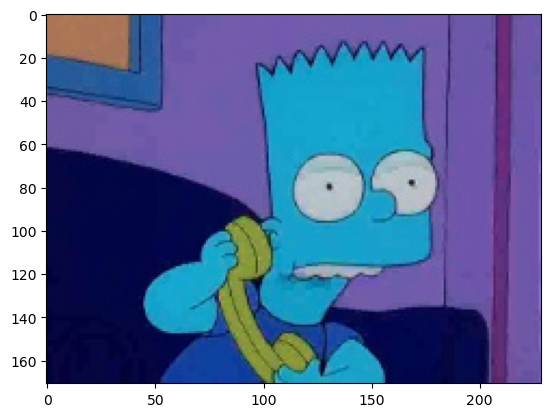

In [42]:
img = cv.imread(test_path)
plt.imshow(img,cmap='gray')
plt.show()

In [43]:
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten',
 'chief_wiggum']

In [44]:
def prepare(image):
    image = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    image = cv.resize(image,IMG_SIZE)
    image = caer.reshape(image,IMG_SIZE,1) #1 is the channel
    return image
    

In [45]:
predictions = model.predict(prepare(img)) #custom image

1/1 [==============================] - 0s 328ms/step


In [46]:
print(characters[np.argmax(predictions[0])])

bart_simpson


Our model has successfully predicted the image to be of BART_SIMPSON !
Course ends here !